In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# from numpy import mean
# from numpy import std
from keras.models import Sequential
from keras.layers import Dense, Normalization, Dropout
from sklearn.model_selection import train_test_split
from keras.callbacks import History
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#НС для 'Прочность при растяжении, МПа', 'Модуль упругости при растяжении, ГПа'

Mounted at /content/drive


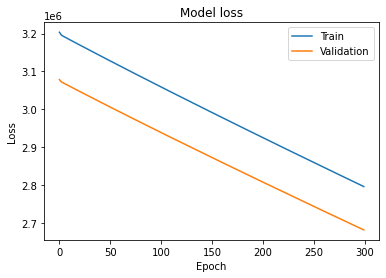

7/7 [==============================] - 0s 2ms/step
MSE для Прочности при растяжении: 5402139.984583687
MSE для Модуля упругости при растяжении: 9.599261450293572
MAE для Прочности при растяжении: 2275.7915402458907
MAE для Модуля упругости при растяжении: 2.465559639259138
R2 для Прочности при растяжении: -23.234313933632436
R2 для Модуля упругости при растяжении: -0.008563454020186878


In [2]:
# загрузка данных
from google.colab import drive
drive.mount ('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/МГТУ/ВКР/Dataset_composites.csv') 

# выбор колонок
# X = df[['Соотношение матрица-наполнитель', 'Количество отвердителя, м.%', 
#        'Содержание эпоксидных групп,%_2', 'Потребление смолы, г/м2', 
#        'Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки']]
# y = df[['Прочность при растяжении, МПа', 'Модуль упругости при растяжении, ГПа']]

X = df[['Соотношение матрица-наполнитель', 'Плотность, кг/м3', 'модуль упругости, ГПа', 'Количество отвердителя, м.%', 
        'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2', 'Поверхностная плотность, г/м2', 'Потребление смолы, г/м2', 
        'Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки']]
y = df[['Прочность при растяжении, МПа', 'Модуль упругости при растяжении, ГПа']]

# разделение на тренировочные и тестовые данные
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# создание модели
model = Sequential()
model.add(Normalization(axis=-1))
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
# model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='tanh'))
model.add(Dense(y_train.shape[1]))

# компиляция модели
model.compile(loss='mse', optimizer='adam')

# обучение модели
history = model.fit(X_train, y_train, epochs=300, batch_size=20, verbose=0, validation_split=0.2)

# визуализация обучения
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# оценка модели на тестовых данных
# scores = model.evaluate(X_test, y_test)
# print(f'Test loss: {scores}')

# прогнозирование значения целевых переменных 
y_pred = model.predict(X_test)

# вычисляем MSE для каждой из двух целевых переменных
mse_strength = mean_squared_error(y_test['Прочность при растяжении, МПа'], y_pred[:, 0])
mse_modulus = mean_squared_error(y_test['Модуль упругости при растяжении, ГПа'], y_pred[:, 1])
print(f'MSE для Прочности при растяжении: {mse_strength}')
print(f'MSE для Модуля упругости при растяжении: {mse_modulus}')

# вычисляем MAE для каждой из двух целевых переменных
mae_strength = mean_absolute_error(y_test['Прочность при растяжении, МПа'], y_pred[:, 0])
mae_modulus = mean_absolute_error(y_test['Модуль упругости при растяжении, ГПа'], y_pred[:, 1])
print(f'MAE для Прочности при растяжении: {mae_strength}')
print(f'MAE для Модуля упругости при растяжении: {mae_modulus}')

# вычисляем R2 для каждой из двух целевых переменных
r2_strength = r2_score(y_test['Прочность при растяжении, МПа'], y_pred[:, 0])
r2_modulus = r2_score(y_test['Модуль упругости при растяжении, ГПа'], y_pred[:, 1])
print(f'R2 для Прочности при растяжении: {r2_strength}')
print(f'R2 для Модуля упругости при растяжении: {r2_modulus}')

# print('Прочность при растяжении, МПа')
# print(f'MSE:, {mean_squared_error(y_test['Прочность при растяжении, МПа'], y_pred[:, 0]):.3f}')
# print(f'RMSE:, {mean_squared_error(y_test, y_pred, squared=False):.3f}')
# print(f'MAE:, {mean_absolute_error(y_test, y_pred):.3f}')
# print(f'R2:, {r2_score(y_test, y_pred):.3f}')

In [ ]:
y_test

In [ ]:
y_pred

In [ ]:
model.summary()

#НС для рекомендации Соотношения матрица-наполнитель

5)	Написать нейронную сеть, которая будет рекомендовать соотношение матрица-наполнитель

In [ ]:
df.columns

Index(['Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2',
       'Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки'],
      dtype='object')

In [3]:
# загрузка данных
from google.colab import drive
drive.mount ('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/МГТУ/ВКР/Dataset_composites.csv') 

# выбор колонок
# X = df[['Плотность, кг/м3', 'модуль упругости, ГПа', 
#        'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2', 'Поверхностная плотность, г/м2', 
#        'Модуль упругости при растяжении, ГПа', 
#        'Прочность при растяжении, МПа', 'Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки']]
X = df.drop('Соотношение матрица-наполнитель', axis=1)
y = df['Соотношение матрица-наполнитель']

# разделение на тренировочные и тестовые данные
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# создание модели
# model = Sequential()
# model.add(Normalization(axis=-1))
# model.add(Dense(64, input_dim=X_train.shape[1], activation='tanh'))
# model.add(Dense(32, activation='tanh'))
# model.add(Dense(1))

model = Sequential()
model.add(Dense(50, input_dim=X.shape[1], activation='relu'))
model.add(Dropout(0.12))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.12))
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.12))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.12))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(1))

# компиляция модели
model.compile(loss='mse', optimizer='adam')

# обучение модели
history = model.fit(X_train, y_train, epochs=100, batch_size=50, verbose=0, validation_split=0.2)

# визуализация обучения
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

#оценка модели на тестовых данных
scores = model.evaluate(X_test, y_test)
print(f'Test loss: {scores:.3f}')

# прогнозирование значения целевых переменных 
y_pred = model.predict(X_test)

print(f'MSE:, {mean_squared_error(y_test, y_pred):.3f}')
print(f'RMSE:, {mean_squared_error(y_test, y_pred, squared=False):.3f}')
print(f'MAE:, {mean_absolute_error(y_test, y_pred):.3f}')
print(f'R2:, {r2_score(y_test, y_pred):.3f}')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


7/7 [==============================] - 0s 3ms/step - loss: 1.0124
Test loss: 1.012
7/7 [==============================] - 0s 2ms/step
MSE:, 1.012
RMSE:, 1.006
MAE:, 0.809
R2:, -0.016


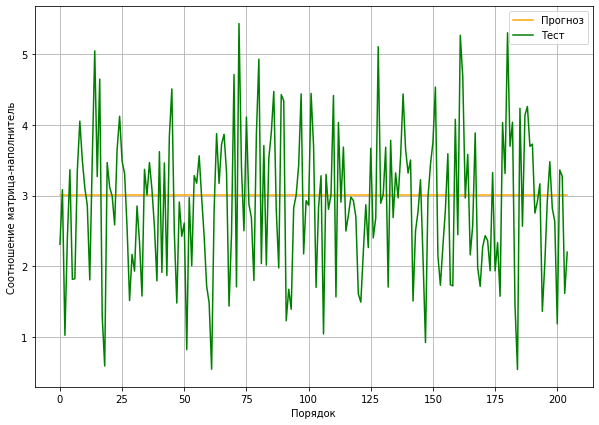

In [4]:
#Визуализация результата 
plt.figure(figsize = (10, 7))
plt.plot(y_pred, label = "Прогноз", color = "orange")
plt.plot(y_test.values, label = "Тест", color = "green")
plt.xlabel("Порядок")
plt.ylabel("Соотношение матрица-наполнитель")
plt.legend()
plt.grid(True)

In [ ]:
y_pred

In [ ]:
y_test

Сохраним модель

In [ ]:
import tensorflow as tf

In [ ]:
model.save("my_model_1")